In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the Data
customers = pd.read_csv("D:/csv file/Customers.csv")
transactions = pd.read_csv("D:/csv file/Transactions.csv")

In [11]:

data = pd.merge(customers, transactions, on='CustomerID')
data['TotalSpend'] = data.groupby('CustomerID')['TotalValue'].transform('sum')  # Adjusted column name
data['TransactionCount'] = data.groupby('CustomerID')['TransactionID'].transform('count')  # Assuming this is correct
features = data[['TotalSpend', 'TransactionCount']].drop_duplicates()

In [ ]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
print("Shape of scaled_features:", scaled_features.shape)
print("Shape of data:", data.shape)

Shape of scaled_features: (199, 2)
Shape of data: (1000, 12)


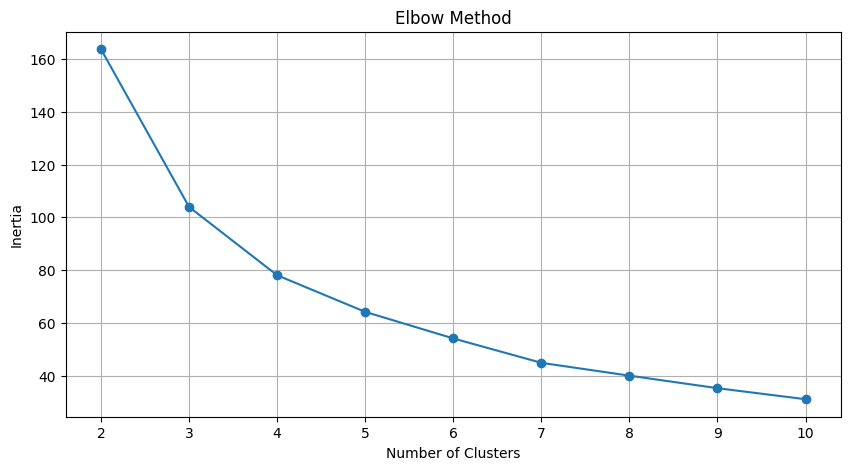

In [21]:

inertia = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [22]:

optimal_clusters = 4  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)


In [ ]:
ata['Cluster'] = kmeans.fit_predict(scaled_features)

In [26]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

ValueError: Length of values (199) does not match length of index (1000)